In [1]:
import pandas as pd
import numpy as np
import os
import re
import requests
from bs4 import BeautifulSoup
import markovify
import matplotlib.pyplot as plt
import requests

os.chdir('/Users/ting/desktop')
os.getcwd()

'/Users/ting/Desktop'

In [155]:
urll = []
for p in range(0, 52):
    urll.append(str('http://www.lotto-8.com/listltobig.asp?indexpage=' + str(p) + '&orderby=new'))

In [156]:
for url in urll:
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    for i in range(0, len(soup.select('[class="auto-style5"]')) - 4, 4):
        d = re.search(r'\d+/\d+/\d+', str(soup.select('[class="auto-style5"]')[4 + i])).group(0)
        with open('lotto.csv', 'a') as f:
            f.write(d)
            f.write(',')
            f.close()

        for j in range(0, 6):
            n = re.search(r'\d+', str(str(soup.select('[class="auto-style5"]')[5 + i]).split('>')[1].split('xa0')).split('xa0,')[j]).group(0)
            with open('lotto.csv', 'a') as f:
                f.write(n)
                f.write(',')
                f.close()
        s = re.search(r'\d+', str(soup.select('[class="auto-style5"]')[6 + i]).split('>')[1]).group(0)
        with open('lotto.csv', 'a') as f:
            f.write(s)
            f.write('\n')
            f.close()


In [163]:
os.chdir('/Users/ting/Projectsting/lotto_predict/TESTDATA')
data = pd.read_csv('lotto.csv', header=None)

In [ ]:
add = []
for i in range(0, 50):
    add.append(1)

In [312]:
for c in range(1, 8):
    l = []
    for i in range(0, 50):
        num = 0
        for j in range(0, len(data[1])):
            if data.iloc[j, c] == i:
                num = num + 1
        l.append((str(i), str(num)))
    m1 = 0
    for m in range(0, 50):
        if int(pd.DataFrame(l).iloc[m1, 1]) > int(pd.DataFrame(l).iloc[m, 1]):
            m1 = m1
        elif int(pd.DataFrame(l).iloc[m1, 1]) == int(pd.DataFrame(l).iloc[m, 1]):
            m1 = m1  
        elif int(pd.DataFrame(l).iloc[m1, 1]) < int(pd.DataFrame(l).iloc[m, 1]):
            m1 = m
    print(m1)
#    



1
8
23
28
36
49
41


分析演算法：馬可夫鍊、時間序列

In [185]:
#馬可夫鍊 exlample
with open("sherlock.txt") as f:
    text = f.read()
#    print(text)
# Build the model.
text_model = markovify.NewlineText(text)

# Print five randomly-generated sentences
for i in range(5):
    print(text_model.make_sentence())

# Print three randomly-generated sentences of no more than 140 characters
for i in range(3):
    print(text_model.make_short_sentence(250))

you. Let the whole thing was! I
However, I threw open a ventilator into another
fatal night Dr. Roylott entirely while we resided with him, so that I was more a feeling of dread which it was I gave him without
up a long thin hands.
much astonished, as you may be set aside altogether. I have ever listened. Let me know your train.


In [2]:
os.chdir('/Users/ting/Projectsting/lotto_predict/TESTDATA')
#pd.read_csv('lotto.csv', header=None).iloc[:, range(1, 8)].to_csv('lotto_mark.csv')

In [183]:
with open("lotto_mark.csv") as f:
    text = f.read()
    print(text)
    
text = text[1: (len(text) + 1)]
text

# Build the model.
text_model = markovify.NewlineText(text)

# Print five randomly-generated sentences
for i in range(5):
    print(text_model.make_sentence())

# Print three randomly-generated sentences of no more than 140 characters
for i in range(3):
    print(text_model.make_short_sentence(140))
    
#此套件無法用來處理大樂透數據

1,2,3,4,5,6,7
12,33,34,38,40,46,7
7,9,19,22,36,49,29
7,8,20,28,34,46,10
3,5,17,32,33,47,36
4,7,23,24,27,41,17
7,21,22,37,41,48,15
4,10,19,26,35,45,38
12,17,20,21,30,45,9
6,10,24,27,41,43,49
1,2,10,11,26,43,40
7,8,15,23,31,36,30
7,23,32,34,43,47,24
2,12,26,28,33,34,44
2,13,16,22,26,48,39
8,26,29,32,36,39,23
1,7,14,22,40,45,29
2,10,22,23,24,37,42
4,13,17,29,31,44,14
2,6,12,18,36,46,47
11,12,15,20,27,47,36
7,8,10,20,24,27,19
12,18,20,21,31,37,24
3,14,18,31,41,42,2
17,19,24,27,31,37,8
16,19,28,37,38,41,10
1,5,8,10,34,35,46
1,12,13,37,41,43,49
2,3,5,28,42,48,9
9,14,17,19,46,47,29
4,8,10,14,41,45,38
12,33,34,38,40,46,7
7,9,19,22,36,49,29
7,8,20,28,34,46,10
3,5,17,32,33,47,36
4,7,23,24,27,41,17
7,21,22,37,41,48,15
4,10,19,26,35,45,38
12,17,20,21,30,45,9
6,10,24,27,41,43,49
1,2,10,11,26,43,40
7,8,15,23,31,36,30
7,23,32,34,43,47,24
2,12,26,28,33,34,44
2,13,16,22,26,48,39
8,26,29,32,36,39,23
1,7,14,22,40,45,29
2,10,22,23,24,37,42
4,13,17,29,31,44,14
2,6,12,18,36,46,47
11,12,15,20,27,47,36
7,8,10

時間序列

In [2]:
os.chdir('/Users/ting/Projectsting/lotto_predict/TESTDATA')
pd.read_csv('lotto.csv', header=None)

,0,1,2,3,4,5,6,7
0,2018/2/20,12,33,34,38,40,46,7
1,2018/2/19,7,9,19,22,36,49,29
2,2018/2/18,7,8,20,28,34,46,10
3,2018/2/17,3,5,17,32,33,47,36
4,2018/2/16,4,7,23,24,27,41,17
5,2018/2/15,7,21,22,37,41,48,15
6,2018/2/13,4,10,19,26,35,45,38
7,2018/2/9,12,17,20,21,30,45,9
8,2018/2/6,6,10,24,27,41,43,49
9,2018/2/2,1,2,10,11,26,43,40


In [236]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
#    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/ting/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/Users/ting/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


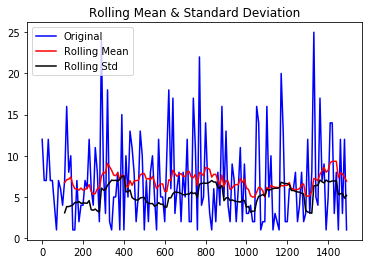

Results of Dickey-Fuller Test:
Test Statistic                -1.039062e+01
p-value                        2.025543e-18
#Lags Used                     1.000000e+00
Number of Observations Used    1.480000e+02
Critical Value (1%)           -3.475325e+00
Critical Value (5%)           -2.881275e+00
Critical Value (10%)          -2.577293e+00
dtype: float64


In [240]:
test_stationarity(pd.read_csv('lotto.csv', header=None).iloc[range(0, 1500, 10), [1]])

#ARIMA

In [3]:
'''
data = pd.read_csv('lotto.csv', header=None).iloc[:, [0, 1]]
data.index = pd.to_datetime(data[0])
data.index.name = 'data'
data.index
del data[0]
data


data_2 = pd.read_csv('lotto.csv', header=None)
data_2.index = pd.to_datetime(data_2[0])
data_2.index.name = 'data'
data_2.index
del data_2[0]
data_2


data_1 = pd.read_csv('test2.csv')
data_1.index = pd.to_datetime(data_1['data'])
data_1.index.name = 'data'
data_1.index
del data_1['data']
data_1


#column name 不是字串，ARIMA不吃
'''


#data_t = pd.read_csv('lotto.csv', header=None)
#data_t.to_csv('test_3.csv')
data_3 = pd.read_csv('test_3.csv')
data_3.index = pd.to_datetime(data_3['0'])
data_3.index.name = 'data'
data_3.index
del data_3['0']
del data_3['Unnamed: 0']
data_3

,1,2,3,4,5,6,7
data,,,,,,,
2018-02-20,12,33,34,38,40,46,7
2018-02-19,7,9,19,22,36,49,29
2018-02-18,7,8,20,28,34,46,10
2018-02-17,3,5,17,32,33,47,36
2018-02-16,4,7,23,24,27,41,17
2018-02-15,7,21,22,37,41,48,15
2018-02-13,4,10,19,26,35,45,38
2018-02-09,12,17,20,21,30,45,9
2018-02-06,6,10,24,27,41,43,49


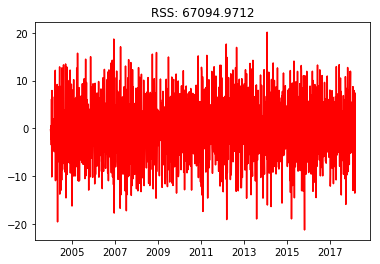

In [14]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_3['3'].astype('float64'), order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues)**2))
plt.show()

In [15]:
pd.Series(results_AR.fittedvalues, copy=True)

data
2018-02-19    -0.004888
2018-02-18     7.429558
2018-02-17     4.430224
2018-02-16     1.643428
2018-02-15    -2.975955
2018-02-13    -1.387104
2018-02-09     2.324033
2018-02-06     0.346596
2018-02-02    -3.008144
2018-01-30     7.932134
2018-01-26     1.431880
2018-01-23   -13.007986
2018-01-19    -1.807878
2018-01-16     8.677116
2018-01-12    -5.245411
2018-01-09     5.533923
2018-01-05    -0.221348
2018-01-02     0.590333
2017-12-29     5.014262
2017-12-26    -0.301820
2017-12-22     2.291844
2017-12-19    -4.953391
2017-12-15    -2.083803
2017-12-12    -3.316257
2017-12-08    -4.709655
2017-12-05    11.919195
2017-12-01     3.473694
2017-11-28     3.604770
2017-11-24    -5.261505
2018-02-20     0.558144
                ...    
2004-04-15     3.393222
2004-04-12    -0.674311
2004-04-08    -4.337164
2004-04-05    -2.051614
2004-04-01     0.654710
2004-03-29   -10.966172
2004-03-25    12.146837
2004-03-22     5.191300
2004-03-18     2.599958
2004-03-15    -1.614746
2004-03-11 

/Users/ting/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


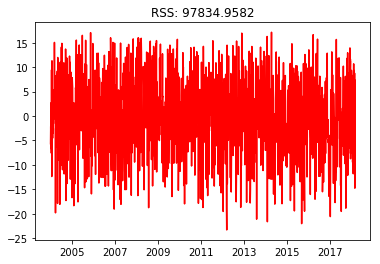

In [9]:
model = ARIMA(data_3['3'].astype('float64'), order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues)**2))
plt.show()

In [11]:
pd.Series(results_ARIMA.fittedvalues, copy=True)

data
2018-02-19     0.000346
2018-02-18     7.361485
2018-02-17     4.163684
2018-02-16     5.487052
2018-02-15    -0.450351
2018-02-13     0.658754
2018-02-09     2.836723
2018-02-06     1.845000
2018-02-02    -2.019949
2018-01-30    10.663011
2018-01-26     4.960898
2018-01-23   -10.265975
2018-01-19    -4.323433
2018-01-16     5.213146
2018-01-12    -7.193877
2018-01-09     7.266805
2018-01-05    -0.902419
2018-01-02     4.202655
2017-12-29     8.108240
2017-12-26     5.382978
2017-12-22     9.330838
2017-12-19     0.017237
2017-12-15     1.540503
2017-12-12    -3.796543
2017-12-08    -7.667924
2017-12-05    11.651131
2017-12-01     6.116156
2017-11-28    13.851027
2017-11-24     1.609228
2018-02-20     8.692730
                ...    
2004-04-15     3.278644
2004-04-12     1.507086
2004-04-08    -3.532351
2004-04-05    -4.288318
2004-04-01    -2.557182
2004-03-29   -19.828503
2004-03-25     7.257064
2004-03-22     0.486273
2004-03-18     8.238871
2004-03-15     1.426216
2004-03-11 

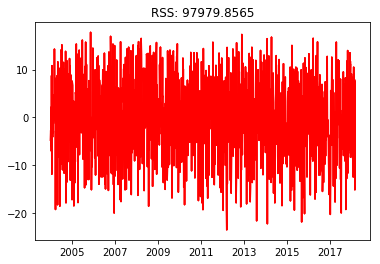

In [7]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_3['3'].astype('float64'), order=(4,1,1))  
results_MA = model.fit(disp=-1)  
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues)**2))
plt.show()

In [12]:
pd.Series(results_MA.fittedvalues, copy=True)

data
2018-02-19     0.000287
2018-02-18     7.439566
2018-02-17     4.444952
2018-02-16     5.598518
2018-02-15    -0.704166
2018-02-13     0.268833
2018-02-09     2.830621
2018-02-06     1.764236
2018-02-02    -2.013053
2018-01-30    10.514961
2018-01-26     5.086378
2018-01-23   -10.761309
2018-01-19    -4.597259
2018-01-16     5.368426
2018-01-12    -6.603220
2018-01-09     7.241668
2018-01-05    -0.711222
2018-01-02     4.053704
2017-12-29     8.128458
2017-12-26     4.988659
2017-12-22     9.138555
2017-12-19    -0.739686
2017-12-15     1.272641
2017-12-12    -4.290404
2017-12-08    -7.497878
2017-12-05    11.726255
2017-12-01     6.597541
2017-11-28    13.511364
2017-11-24     1.102718
2018-02-20     7.792420
                ...    
2004-04-15     2.744193
2004-04-12     2.002567
2004-04-08    -4.166589
2004-04-05    -4.035759
2004-04-01    -2.845000
2004-03-29   -19.235896
2004-03-25     7.352769
2004-03-22     1.531589
2004-03-18     8.214871
2004-03-15     1.523052
2004-03-11 

In [16]:
data_3['2017-11-24']

,1,2,3,4,5,6,7
data,,,,,,,
2017-11-24,4,8,10,14,41,45,38
2017-11-24,4,8,10,14,41,45,38
